In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import community
import csv
import matplotlib
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from collections import Counter
from community import community_louvain

Total number of Edges= 80381
Total number of Nodes= 21552


{7222: 0.3325135724560345,
 7130: 0.14393763630457984,
 684: 0.09317433065751009,
 5923: 0.08491485313906548,
 1519: 0.0809707206162127,
 15791: 0.07549533664331122,
 7522: 0.0720152197113823,
 12381: 0.0665862372975732,
 17759: 0.050345691615238275,
 11136: 0.03860609716486474}

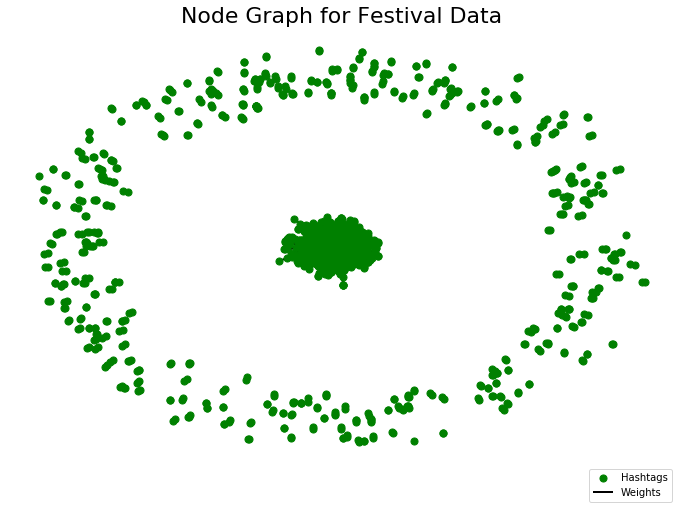

In [2]:
# Figure Dimensions
value_height=9
value_width=16
matplotlib.rcParams['figure.figsize']=[12, 8]

#Reading the data from file
df = pd.read_excel('C:/..../glaston_AD_edges_CD.xlsx')

# Creating a graph from a pandas dataframe
G = nx.from_pandas_edgelist(df, 'Source', 'Target', 'Weights')
for index, row in df.iterrows():
    G.add_edge(row['Source'], row['Target'])
    
# Position nodes using Fruchterman-Reingold force-directed algorithm
pos = nx.spring_layout(G)
# Drawing the graph
nx.draw_networkx_nodes(G, pos, with_labels=True, node_size=50,font_size=7,node_color='green', label='Hashtags')
nx.draw_networkx_edges(G, pos, with_labels=False, width=2.0,label='Weights')
plt.title('Node Graph for Festival Data', fontsize=22)
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(1, 0), loc='best', ncol=1)
plt.savefig('C:/..../base.png', dpi=400)

# Additional metrics
print("Total number of Edges=", len(G.edges()))
print("Total number of Nodes=", len(G.nodes()))
# Centrality Metrics

# Calculating Centrality metrics for the Graph

dict_degree_centrality = nx.degree_centrality(G)
dict_closeness_centrality = nx.closeness_centrality(G)
dict_eigenvector_centrality = nx.eigenvector_centrality(G)

# Top 10 nodes with the largest values of degree centrality in descending order
dict(Counter(dict_degree_centrality).most_common(10))

In [3]:
# Centrality Metrics

# Calculating Centrality metrics for the Graph

dict_degree_centrality = nx.degree_centrality(G)
dict_closeness_centrality = nx.closeness_centrality(G)
dict_eigenvector_centrality = nx.eigenvector_centrality(G)

# Top 10 nodes with the largest values of degree centrality in descending order
dict(Counter(dict_degree_centrality).most_common(10))

{7222: 0.3325135724560345,
 7130: 0.14393763630457984,
 684: 0.09317433065751009,
 5923: 0.08491485313906548,
 1519: 0.0809707206162127,
 15791: 0.07549533664331122,
 7522: 0.0720152197113823,
 12381: 0.0665862372975732,
 17759: 0.050345691615238275,
 11136: 0.03860609716486474}

In [4]:
# Top 10 nodes with the largest values of closeness centrality in descending order
dict(Counter(dict_closeness_centrality).most_common(10))

{7222: 0.5797843973631197,
 7130: 0.5153967713334553,
 1519: 0.4922087500767166,
 15791: 0.4880714431269642,
 684: 0.4872241173028102,
 12381: 0.47832041228309735,
 17759: 0.4768417457263415,
 5923: 0.47320139143130174,
 11136: 0.4707320928318373,
 7522: 0.4669465687687629}

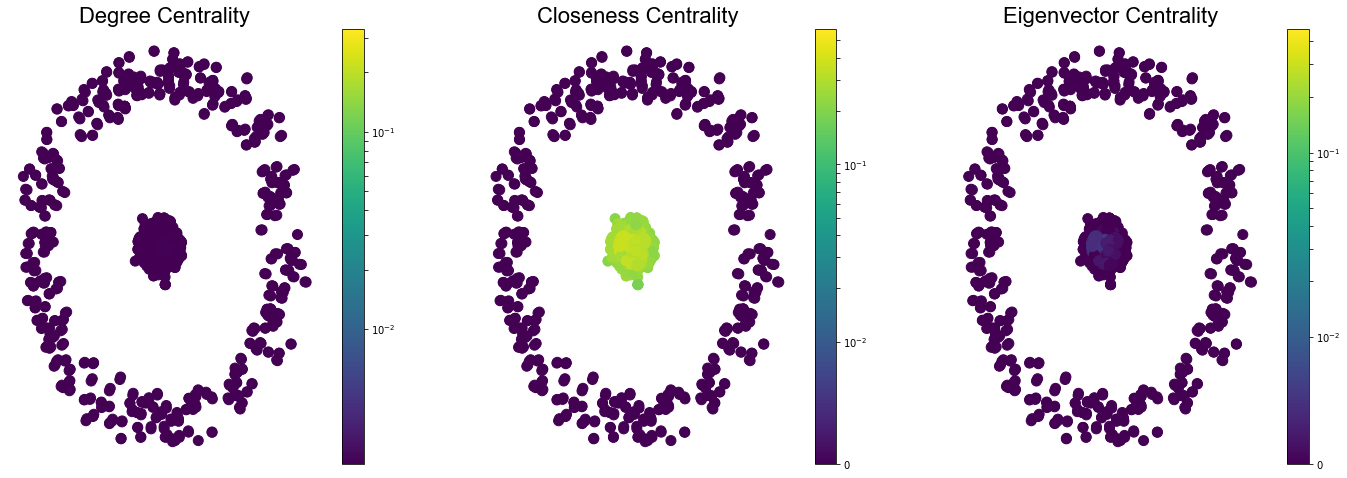

In [5]:
# Function to plot the graphs for each centrality metric
matplotlib.rcParams['figure.figsize']= [24, 8]
def draw(G, pos, lista, listb, measure_name):
    nodes=nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.viridis,node_color=lista,nodelist=listb)
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    edges=nx.draw_networkx_edges(G, pos)
    plt.title(measure_name, fontsize=22, fontname='Arial')
    plt.colorbar(nodes)
    plt.axis('off')

plt.subplot(1,3,1)
list_pos_values = []
for i in nx.degree_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.degree_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Degree Centrality')

plt.subplot(1,3,2)
list_pos_values=[]
for i in nx.closeness_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.closeness_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Closeness Centrality')

plt.subplot(1,3,3)
list_pos_values=[]
for i in nx.eigenvector_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.eigenvector_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Eigenvector Centrality')
plt.savefig('C:/...../centrality_summary.png' , dpi=400)

In [6]:
# Starting with an initial partition of the graph and running the Louvain algorithm for Community Detection
partition=community_louvain.best_partition(G, weight='Weights')
print('Completed Louvain algorithm .. . . ' )
values=[partition.get(node) for node in G.nodes()]
list_com=partition.values()

# Creating a dictionary like {community_number:list_of_participants}
dict_nodes={}

# Populating the dictionary with items
for each_item in partition.items():
    community_num=each_item[1]
    community_node=each_item[0]
    if community_num in dict_nodes:
        value=str(dict_nodes.get(community_num)) + ' | ' + str(community_node)
        dict_nodes.update({community_num:value})
    else:
        dict_nodes.update({community_num:community_node})

# Creating a dataframe from the diet, and getting the output into excel
community_df=pd.DataFrame.from_dict(dict_nodes, orient='index',columns=['Hashtags'])
community_df.index.rename('Community_Num' , inplace=True)
community_df.to_csv('C:/...../Community_List_snippet.csv')

Completed Louvain algorithm .. . . 


Modularity:  0.5390419291613888
Total number of Communities= 336


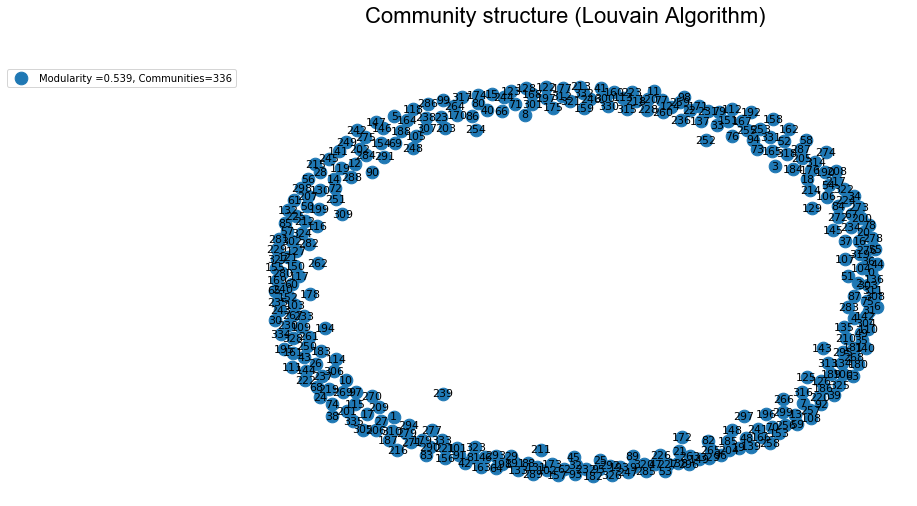

In [7]:
# Creating a new graph to represent the communities created by the Louvain algorithm
matplotlib.rcParams['figure.figsize']= [12, 8]
G_comm=nx.Graph()

# Populating the data from the node dictionary created earlier
G_comm.add_nodes_from(dict_nodes)

# Calculating modularity and the total number of communities
mod=community_louvain.modularity(partition,G)
print("Modularity: ", mod)
print("Total number of Communities=", len(G_comm.nodes()))

# Creating the Graph and also calculating Modularity
matplotlib.rcParams['figure.figsize']= [12, 8]
pos_louvain=nx.spring_layout(G_comm)
nx.draw_networkx(G_comm, pos_louvain, with_labels=True,node_size=160,font_size=11,label='Modularity =' + str(round(mod,3)) +
                    ', Communities=' + str(len(G_comm.nodes())))
plt.suptitle('Community structure (Louvain Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('C:/..../louvain.png',dpi=400, bbox_inches='tight')

In [9]:
G_comm.nodes()
G_comm.edges()
df.Weights


0           1
1           1
2           1
3        3583
4        3583
         ... 
80376       1
80377       1
80378       1
80379       1
80380       1
Name: Weights, Length: 80381, dtype: int64

In [10]:
# Viewing the list of communities
community_df

Hashtags
Community_Num                                                   
0              6453 | 19283 | 966 | 11142 | 9833 | 16760 | 11...
1              5923 | 18605 | 15218 | 17188 | 16112 | 19128 |...
2              8901 | 9571 | 11951 | 5266 | 3328 | 3170 | 212...
3              1519 | 7169 | 9598 | 15161 | 1548 | 4635 | 207...
4              19949 | 1514 | 16644 | 5449 | 339 | 2917 | 183...
...                                                          ...
331                                                 4905 | 15171
332                                                  8361 | 8400
333                                     858 | 19470 | 6396 | 502
334                                                   361 | 5848
335                                                 4080 | 13518

[336 rows x 1 columns]

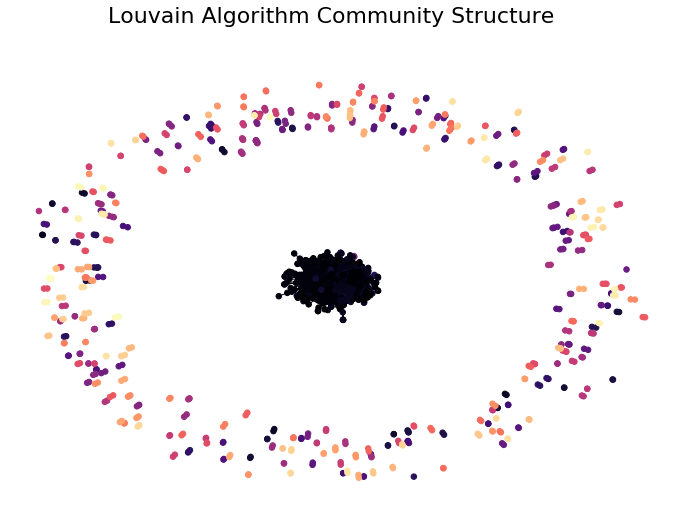

In [11]:

# Now we try to obtain the color coded graph for each community
nx.draw_networkx(G, pos, cmap=plt.get_cmap('magma'), node_color=values,node_size=30, with_labels=False)
plt.suptitle('Louvain Algorithm Community Structure',fontsize=22)
plt.box(on=None)
plt.axis('off')
plt.savefig('C:/...../louvain_2.png',dpi=400, bbox_inches='tight')
plt.show()

In [12]:
# Using the Girvan-Newman algorithm to create a Communicty Structure
from networkx.algorithms.community.centrality import girvan_newman
from operator import itemgetter


def heaviest(G):
  u, v, w =max(G.edges(data='Weights'), key=itemgetter(2))
  return (u, v)

edges = G.edges()
nx.set_edge_attributes(G, {(u, v): v for u, v in edges}, 'Weights')
comp=girvan_newman(G,most_valuable_edge=heaviest)

#comp=girvan_newman(G)

In [13]:
type(G)
heaviest(G)

(7222, 21552)

In [14]:
# Creating a dictionary for the community number assocaited with each node
com=0
thisdict={}

# Populating the items of the dictionary

for c in next(comp):
    list=sorted(c)
    for i in range(len(list)):
        if list[i] in thisdict:
            print('already found')
        else:
            thisdict.update({list[i]: com})
        i+=1
    com+=1

values_girvan=[thisdict.get(node) for node in G.nodes()]
#values_girvan


In [15]:
#just for illustration
d1=pd.DataFrame.from_dict(thisdict,orient='index', dtype=None) 
d1.tail(50)

0
21001  282
11253  283
18244  283
4993   284
13272  284
18217  285
18698  285
12512  286
20336  286
2793   287
2981   287
4803   287
19210  287
484    288
8466   288
5417   289
20468  289
2440   290
3329   290
6580   290
3141   291
19145  291
14302  292
14303  292
5778   293
7767   293
5369   294
19083  294
17523  295
17654  295
154    296
1191   296
16432  297
17057  297
4130   298
10063  298
5300   299
8059   299
4905   300
15171  300
8361   301
8400   301
502    302
858    302
6396   302
19470  302
361    303
5848   303
4080   304
13518  304

Total number of Communities= 305



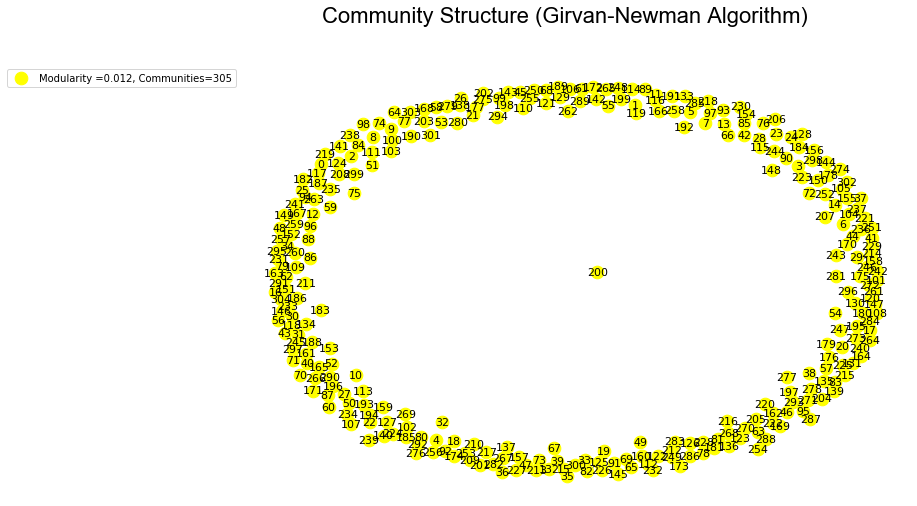

In [16]:
# Creating a dictionary like 'Community num':'List of nodes'
dict_nodes_girvan={}
for each_item in thisdict.items():
    community_num=each_item[1]
    community_node=each_item[0]
    
    if community_num in dict_nodes_girvan:
        value=str(dict_nodes_girvan.get(community_num) )+ ' | ' + str(community_node)
        dict_nodes_girvan.update({community_num: value})
    else:
        dict_nodes_girvan.update({community_num: community_node})
        
# Creating the output file
community_df_girvan=pd.DataFrame.from_dict(dict_nodes_girvan, orient='index',columns=['Hastags'])
community_df_girvan.index.rename('Community Num', inplace=True)
community_df_girvan.to_csv('C:/...../Community_List_girvan_snippet.csv')

# Creating a graph where each node represents a community
G_comm_girvan=nx.Graph()
G_comm_girvan.add_nodes_from(dict_nodes_girvan)

# Calculation of number of communities and modularity
print("Total number of Communities=", len(G_comm_girvan.nodes()))
print(G)
mod_girv=community.modularity(thisdict,G)

# Creation of the graph

pos_girvan=nx.spring_layout(G_comm_girvan)
nx.draw_networkx(G_comm_girvan, pos_girvan,with_labels=True,node_size=160,font_size=11, node_color='yellow',
                 label='Modularity =' + str(round(mod_girv,3)) +', Communities=' + str(len(G_comm_girvan.nodes())))
plt.suptitle('Community Structure (Girvan-Newman Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('C:/...../Girvan-Newman.png', dpi=400, bbox_inches='tight')


In [17]:
# Viewing the list of communities
community_df_girvan

Hastags
Community Num                                                   
0              1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | ...
1                                                   9401 | 11776
2                                                  17456 | 20839
3                                                   5980 | 16731
4                                                   8837 | 20628
...                                                          ...
300                                                 4905 | 15171
301                                                  8361 | 8400
302                                     502 | 858 | 6396 | 19470
303                                                   361 | 5848
304                                                 4080 | 13518

[305 rows x 1 columns]

In [18]:
# Finding the Maximal Cliques associated with teh graph
a=nx.find_cliques(G)
i=0

# For each clique, print the members and also print the total number of communities
for clique in a:
    print (clique)
    i+=1
total_comm_max_cl=i
print('Total number of communities: ',total_comm_max_cl)

[2, 899]
[3, 1315, 6757, 19713, 19889, 19748, 1313, 882, 11324, 1971, 5451, 8668]
[3, 1315, 6757, 19713, 19889, 19748, 1313, 882, 11324, 1971, 9356]
[3, 1315, 6757, 19713, 19889, 19748, 18209, 5451]
[3, 1315, 6757, 19713, 19889, 10285, 18209]
[3, 1315, 6757, 13477, 18209, 10285]
[4, 18209, 19713, 19889, 5451, 19748, 6349]
[5, 13383, 171, 13599, 3572, 2812, 19733]
[6, 12913, 535]
[7, 11136, 684, 8087, 14269, 11221, 13758, 11127]
[8, 6226, 1106, 18392, 18389, 18515, 12381]
[9, 16711, 11280, 16728, 3129, 12381]
[10, 5649, 7130]
[12, 9690]
[13, 11418, 7388]
[14, 7130, 17759]
[17, 18769, 7522, 18770]
[18, 4484, 8904, 9008, 6866, 6199]
[19, 3506, 7130]
[20, 1519]
[21, 5923]
[21, 8356]
[21, 19070]
[22, 18240, 10785, 1115]
[23, 2945]
[24, 1519]
[25, 12088, 19385, 15426]
[27, 15791]
[29, 17759]
[30, 7130]
[31, 7480, 12091, 5586, 5923]
[32, 10128, 9690]
[33, 12865, 12833, 6227, 8403, 13407, 8727]
[34, 14530, 2434, 7012, 5671, 2087, 684, 7502, 21394, 1406, 5725, 8822, 4991]
[35, 5520]
[36, 13409,

In [19]:
from math import *
import itertools as it

# Defining a circle that can be drawn around each community
def draw_circle_around_clique(clique,coords):
    dist=0
    temp_dist=0
    center=[0 for i in range(2)]
    color=next(colors)
    for a in clique:
        for b in clique:
            temp_dist=(coords[a][0]-coords[b][0])**2+(coords[a][1]-coords[b][1])**2
            if temp_dist>dist:
                dist=temp_dist
                for i in range(2):
                    center[i]=(coords[a][i]+coords[b][i])/2
    rad=dist**0.5/2
    cir=plt.Circle((center[0],center[1]),radius=rad*1.3,fill=False,color=color)
    plt.gca().add_patch(cir)
    plt.axis('scaled')
    return color

# Setting a cycle of colors,
global colors, hatches
colors=it.cycle('b')

Clique to appear :  [2, 899]
Clique to appear :  [3, 1315, 6757, 19713, 19889, 19748, 1313, 882, 11324, 1971, 5451, 8668]
Clique to appear :  [3, 1315, 6757, 19713, 19889, 19748, 1313, 882, 11324, 1971, 9356]
Clique to appear :  [3, 1315, 6757, 19713, 19889, 19748, 18209, 5451]
Clique to appear :  [3, 1315, 6757, 19713, 19889, 10285, 18209]
Clique to appear :  [3, 1315, 6757, 13477, 18209, 10285]
Clique to appear :  [4, 18209, 19713, 19889, 5451, 19748, 6349]
Clique to appear :  [5, 13383, 171, 13599, 3572, 2812, 19733]
Clique to appear :  [6, 12913, 535]
Clique to appear :  [7, 11136, 684, 8087, 14269, 11221, 13758, 11127]
Clique to appear :  [8, 6226, 1106, 18392, 18389, 18515, 12381]
Clique to appear :  [9, 16711, 11280, 16728, 3129, 12381]
Clique to appear :  [10, 5649, 7130]
Clique to appear :  [12, 9690]
Clique to appear :  [13, 11418, 7388]
Clique to appear :  [14, 7130, 17759]
Clique to appear :  [17, 18769, 7522, 18770]
Clique to appear :  [18, 4484, 8904, 9008, 6866, 6199]
Cl

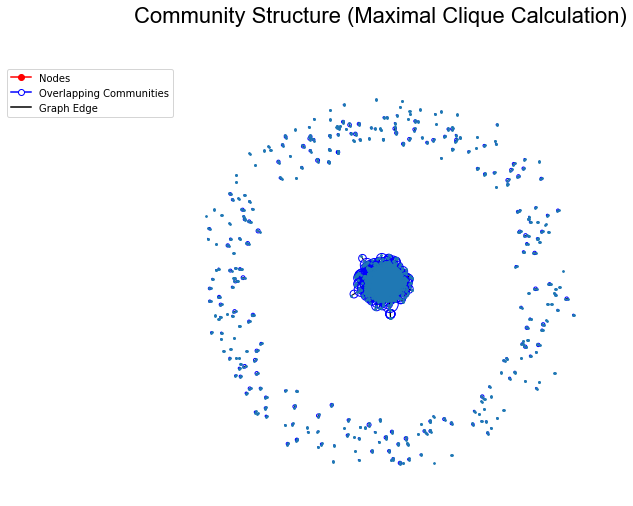

In [20]:
# Remove "len(clique)>2" if you're interested in maxcliques with 2 edges
cliques=[clique for clique in nx.find_cliques(G) if len(clique)>1]

# Draw the graph
nx.draw_networkx(G,pos, node_size=3, with_labels=False)
for clique in cliques:
    print("Clique to appear : ",clique)
    nx.draw_networkx_nodes(G,pos,nodelist=clique,node_color=draw_circle_around_clique(clique,pos),node_size=1000, alpha=0)
plt.suptitle('Community Structure (Maximal Clique Calculation)',fontsize=22, fontname='Arial')
plt.box(on=None)
plt.axis('off')
         
red_patch=mpatches.Patch(color='r', label='Nodes')
#blue_patch = plt.Circle(color='b', label='Overlapping Communities', fill=False)

red_patch=plt.Line2D([],[], color="red", marker='o', markerfacecolor="red",label='Nodes')
blue_patch=plt.Line2D([],[], color="blue", marker='o', markerfacecolor='white',label='Overlapping Communities')
black_patch=plt.Line2D([],[], color="black",label='Graph Edge')
plt.legend(handles=[red_patch,blue_patch, black_patch],bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('C:/...../Cliques.png',dpi=400, bbox_inches='tight')
plt.show()

In [21]:
print(len(cliques))

40918


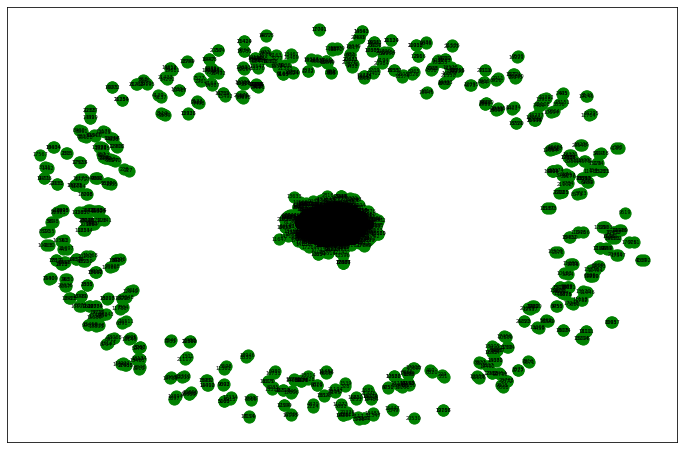

In [22]:
nx.draw_networkx(G, pos,node_color='green', node_size=125, label='Hashtags', font_size=5)
plt.savefig('C:/...../nodes.png',dpi=400)